In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("Downloads/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Analysis

In [4]:
df.shape

(1338, 7)

In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

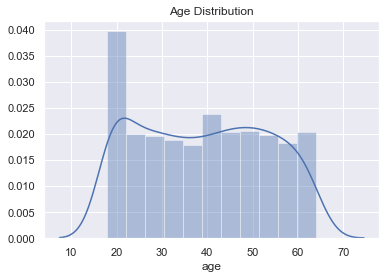

In [20]:
sns.set()
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

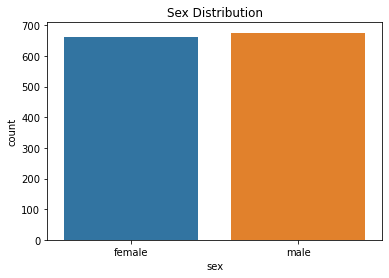

In [15]:
sns.countplot(df['sex'])
plt.title('Sex Distribution')
plt.show()

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

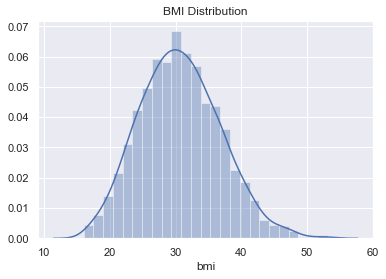

In [19]:
sns.set()
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

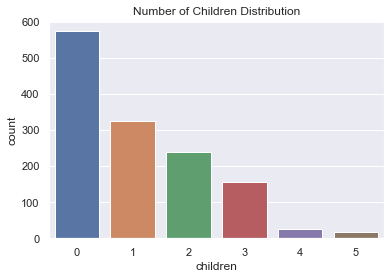

In [33]:
sns.set()
sns.countplot(df['children'])
plt.title('Number of Children Distribution')
plt.show()

In [26]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

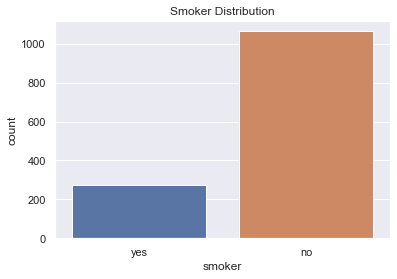

In [32]:
sns.set()
sns.countplot(df['smoker'])
plt.title('Smoker Distribution')
plt.show()

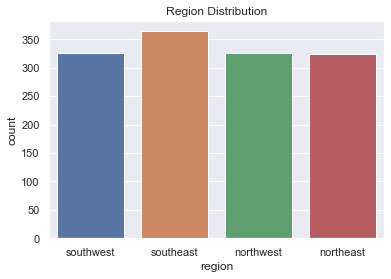

In [31]:
sns.set()
sns.countplot(df['region'])
plt.title('Region Distribution')
plt.show()

In [28]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

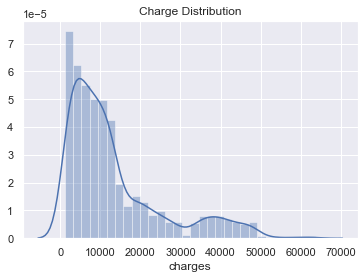

In [30]:
sns.set()
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show()

# Data Pre-processing

In [34]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,"northwest":3}},inplace=True)


In [35]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


# Split the dataset as features and target

In [44]:
X = df.iloc[:,0:6]

In [45]:
Y = df.iloc[:,-1:]

In [46]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [47]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [49]:
print(X.shape)
print(X_train.shape,X_test.shape)

(1338, 6)
(1070, 6) (268, 6)


# Model Training

In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [52]:
training_data_prediction=regressor.predict(X_train)

In [55]:
training_data_prediction

array([[  478.49404197],
       [ 9317.75369733],
       [13193.79859142],
       ...,
       [17327.55442479],
       [ 9600.51860822],
       [13753.18970971]])

In [54]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print("R-squared value: ",r2_train)

R-squared value:  0.751505643411174


In [56]:
test_data_prediction=regressor.predict(X_test)

In [58]:
test_data_prediction

array([[ 1520.59242161],
       [11570.5920178 ],
       [10082.43849883],
       [ 2246.21754312],
       [ 7881.28362035],
       [11081.50227956],
       [ 3538.24791808],
       [  698.03224036],
       [12223.4851558 ],
       [ 9611.93217623],
       [11657.51046259],
       [ 4891.0539656 ],
       [29947.50192274],
       [ -370.8384887 ],
       [12401.36048618],
       [13243.21522903],
       [ 3814.42216541],
       [ 7883.39384825],
       [29431.34485576],
       [ 2362.83672121],
       [12505.50452609],
       [ 2256.75277238],
       [34468.01948464],
       [31742.4859866 ],
       [30306.19118561],
       [ 9027.76110059],
       [ 1923.87420399],
       [15247.09503907],
       [ 6542.61302531],
       [ 2104.79910554],
       [ 9484.36642532],
       [ 5794.91649267],
       [ 4425.26853454],
       [ 5015.3811241 ],
       [ 9579.4545934 ],
       [ 4601.74838962],
       [29875.58083252],
       [ 6797.04084444],
       [27239.25811383],
       [13999.0938259 ],


In [59]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print("R-squared value: ",r2_test)

R-squared value:  0.7447273869684077


# Building a predictive system

In [60]:
input_data = (31,1,25.74,0,1,0)

In [61]:
input_array = np.asarray(input_data)
input_reshaped = input_array.reshape(1,-1)
prediction = regressor.predict(input_reshaped)
print(prediction)

[[3760.0805765]]


In [65]:
print("Insurance cost in USD: ",prediction[0][0])

Insurance cost in USD:  3760.0805764960496
